# ML With Python Module 3 Case Study 1 

Objective:

1.Make the learner load the data using pandas.

2.Create new columns in dataset from existing columns.

3.Use pandas to answer questions of interest.

4.Plot variables of interest.

Dataset used:Prisoners dataset sourced from data.gov.in

## Question 1 :- Data Loading

a. Loading the dataset “prisoners.csv” and displaying first, last five records 

In [1]:
#importing libraries to python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
#reading csv file
df_prisoners = pd.read_csv('C:/ML_Edureka/module2/prisoners.csv')

In [46]:
#displaying first 
df_prisoners.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


In [47]:
#and last five records
df_prisoners.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


b.Use describe method in pandas and find out the number of columns. Can you say something about those rows who have zero inmates?

In [48]:
#calculating no. of columns
df_prisoners.columns

Index(['STATE/UT', 'YEAR', 'No. of Inmates benefitted by Elementary Education',
       'No. of Inmates benefitted by Adult Education',
       'No. of Inmates benefitted by Higher Education',
       'No. of Inmates benefitted by Computer Course'],
      dtype='object')

In [49]:
df_prisoners.dtypes

STATE/UT                                             object
YEAR                                                  int64
No. of Inmates benefitted by Elementary Education     int64
No. of Inmates benefitted by Adult Education          int64
No. of Inmates benefitted by Higher Education         int64
No. of Inmates benefitted by Computer Course          int64
dtype: object

In [50]:
print("no. of rows and columns are",df_prisoners.shape)

no. of rows and columns are (35, 6)


In [51]:
# rows with zero inmates
print(df_prisoners[(df_prisoners['No. of Inmates benefitted by Elementary Education'] == 0) &
                    (df_prisoners['No. of Inmates benefitted by Adult Education'] == 0) &
                    (df_prisoners['No. of Inmates benefitted by Higher Education'] == 0) &
                    (df_prisoners['No. of Inmates benefitted by Computer Course'] == 0)])

             STATE/UT  YEAR  \
1   Arunachal Pradesh  2013   
15            Manipur  2013   
18           Nagaland  2013   
22             Sikkim  2013   
30       D & N Haveli  2013   
31        Daman & Diu  2013   
33        Lakshadweep  2013   
34        Pondicherry  2013   

    No. of Inmates benefitted by Elementary Education  \
1                                                   0   
15                                                  0   
18                                                  0   
22                                                  0   
30                                                  0   
31                                                  0   
33                                                  0   
34                                                  0   

    No. of Inmates benefitted by Adult Education  \
1                                              0   
15                                             0   
18                                             0  

## Question 2:- Data Manipulation

a.Create a new column -’total_benefitted’ that is a sum of inmates benefitted through all modes.

In [52]:
df_prisoners['total_benefitted'] = df_prisoners[['No. of Inmates benefitted by Elementary Education','No. of Inmates benefitted by Adult Education',
                                                'No. of Inmates benefitted by Higher Education','No. of Inmates benefitted by Computer Course']].sum(axis=1)

In [53]:
df_prisoners.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
0,Andhra Pradesh,2013,9480,13758,672,170,24080
1,Arunachal Pradesh,2013,0,0,0,0,0
2,Assam,2013,676,750,14,30,1470
3,Bihar,2013,1693,3013,125,1417,6248
4,Chhatisgarh,2013,1664,1803,192,103,3762


b. Create a new row -“totals” that is the sum of all inmates benefitted through each mode across all states.

In [54]:
a = df_prisoners['No. of Inmates benefitted by Elementary Education'].sum(axis=0)
b = df_prisoners['No. of Inmates benefitted by Adult Education'].sum(axis=0)
c = df_prisoners['No. of Inmates benefitted by Higher Education'].sum(axis=0)
d = df_prisoners['No. of Inmates benefitted by Computer Course'].sum(axis=0)

z = {'YEAR': 2013,'No. of Inmates benefitted by Elementary Education': a,
    'No. of Inmates benefitted by Adult Education': b, 'No. of Inmates benefitted by Higher Education': c,
    'No. of Inmates benefitted by Computer Course': d}
df_prisoners = df_prisoners.append(z,ignore_index=True,verify_integrity=False,sort=None)
#df_prisoners.loc[30:35]

## Question 3:- Plotting

a. Make a bar plot with each state name on the x -axis and their total benefitted inmates as their bar heights. Which state has the maximum number of beneficiaries?

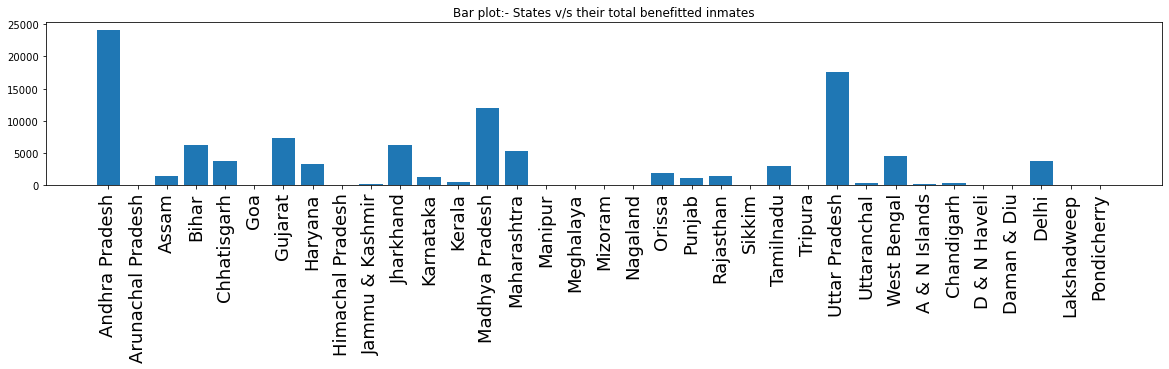

In [55]:
df_prisoners_data = df_prisoners.loc[:34] 
xlabels = df_prisoners_data['STATE/UT'].values
plt.figure(figsize=(20, 3))
plt.xticks(np.arange(xlabels.shape[0]), xlabels, rotation = 'vertical', fontsize = 18)
#plt.xticks
plt.bar(np.arange(df_prisoners_data.values.shape[0]),df_prisoners_data['total_benefitted'],align = 'center')
plt.title('Bar plot:- States v/s their total benefitted inmates')
plt.show()

Answer:- Andhdra Pradesh has the maximum number of beneficiaries  

b.Make a pie chart that depicts the ratio among different modes of benefits

In [56]:
df_prisoners_labels = df_prisoners.columns[2:6]


In [57]:
df_prisoners_ratio = df_prisoners.iloc[35:, 2:6]
z=df_prisoners_ratio.values


<ipython-input-58-bd7801abdbae>:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(z, labels=df_prisoners_labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=120)


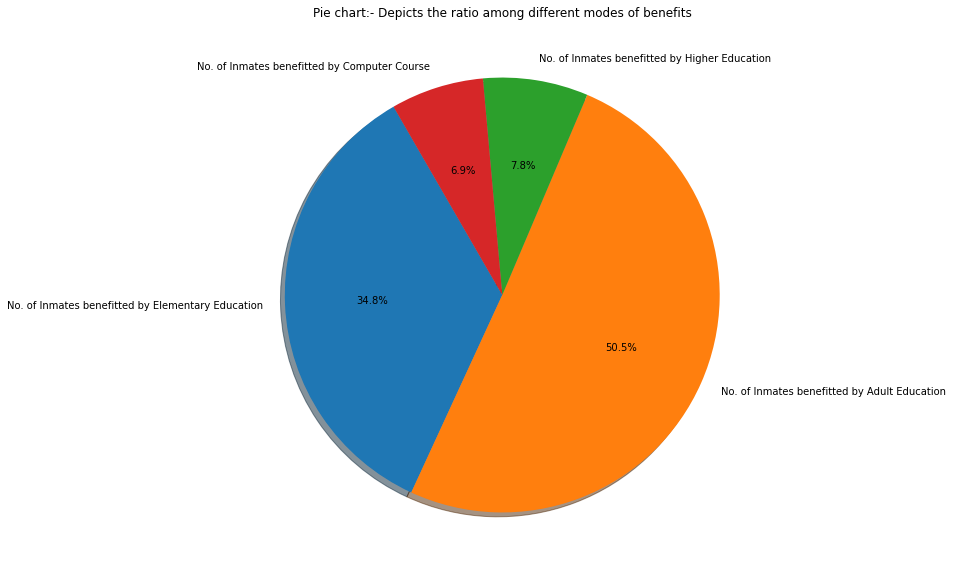

In [58]:
plt.figure(figsize=(20, 10))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
plt.pie(z, labels=df_prisoners_labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=120)
plt.title('Pie chart:- Depicts the ratio among different modes of benefits')
plt.show()